In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import seaborn as sns
import pandas as pd

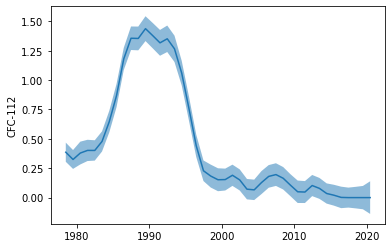

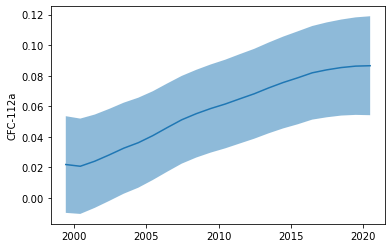

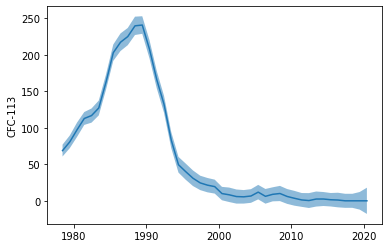

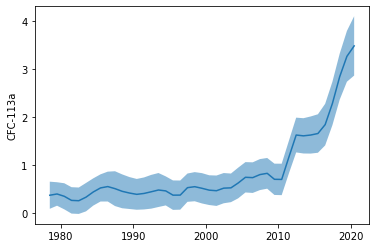

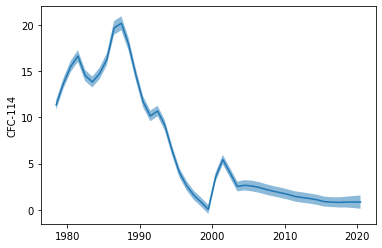

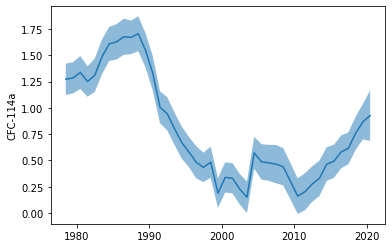

In [9]:
species_list = ["CFC-112", "CFC-112a", "CFC-113","CFC-113a", "CFC-114", "CFC-114a"]
lpath = Path("/user/home/lw13938/work/py12box_laube/data/")
emissions = {}

for species in species_list:

    df = pd.read_csv(lpath / species / f"outputs/{species}_Global_annual_emissions.csv", comment="#")
    emissions[species] = {"date":df.Decimal_date, "emissions":df.Global_annual_emissions,
                            "sd":df["Global_annual_emissions_1-sigma"]} 

    plt.figure()
    plt.plot(df.Decimal_date, df.Global_annual_emissions)
    plt.fill_between(df.Decimal_date, df.Global_annual_emissions+df["Global_annual_emissions_1-sigma"],
                    df.Global_annual_emissions-df["Global_annual_emissions_1-sigma"], alpha=0.5)
    plt.ylabel(species)
    plt.savefig(f"/user/home/lw13938/work/minorCFCs/Figs/"+pd.to_datetime("today").strftime("%Y-%m-%d")+f"_{species}_emissions.png", dpi=200)

In [10]:
# Load in GWPs etc
data_dir = Path("/user/home/lw13938/work/scripts_py12box/OzoneAssessment2022/data/")
gwps = pd.read_csv(data_dir / "SAOD22_GWP.csv",
                  skiprows = 1, skipinitialspace = True, index_col = "Gas")["GWP"]
odps = pd.read_csv(data_dir /  "mr_ODP.csv",
                  skiprows = 1, skipinitialspace = True, index_col = "Species")["WMO2018"]
    

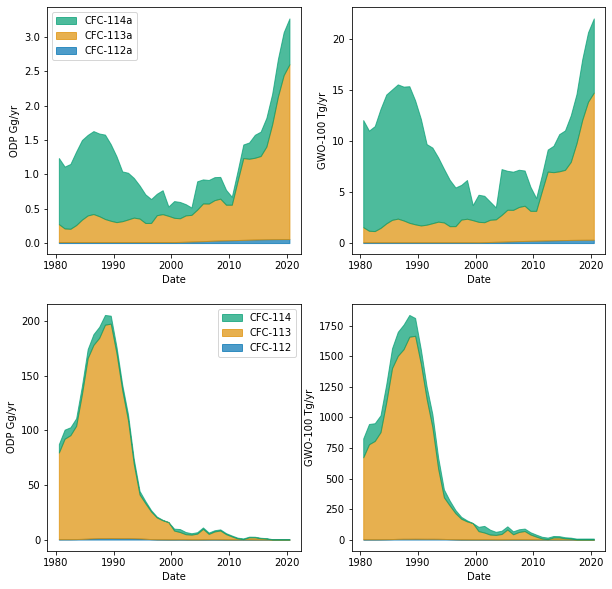

In [11]:
clrs = sns.color_palette('colorblind',6)
#clrs =  ["#d55e00","#cc79a7","#0072b2","#f0e442","#009e73","#b66dff"]
species_list = ["CFC-112a", "CFC-113a", "CFC-114a"] 
total_odp = pd.DataFrame(data = {"odp": np.zeros(41)},
                          index = np.arange(1980.5, 2020.51))
total_gwp = pd.DataFrame(data = {"gwp": np.zeros(41)},
                          index = np.arange(1980.5, 2020.51))

fig, ax = plt.subplots(2,2, figsize=(10,10))
for s, species in enumerate(species_list):

    dfodp = pd.DataFrame(data = {"odp":emissions[species]["emissions"].values*odps[species]},
                            index = emissions[species]["date"].values + 0.04).reindex_like(total_odp, method = "nearest")
    dfgwp = pd.DataFrame(data = {"gwp":emissions[species]["emissions"].values*gwps[species]*1e-3},
                            index = emissions[species]["date"].values + 0.04).reindex_like(total_gwp, method = "nearest")
    lowerodp = total_odp.odp.values
    lowergwp = total_gwp.gwp.values
    total_odp = total_odp.add(dfodp)
    total_gwp = total_gwp.add(dfgwp)
    ax[0,0].fill_between(total_odp.index,lowerodp, total_odp.odp.values, label=species, 
                        alpha=0.7, color=clrs[s])
    ax[0,1].fill_between(total_gwp.index,lowergwp, total_gwp.gwp.values, label=species, 
                        alpha=0.7, color=clrs[s])

species_list = ["CFC-112", "CFC-113", "CFC-114"]                        
total_odp = pd.DataFrame(data = {"odp": np.zeros(41)},
                          index = np.arange(1980.5, 2020.51))
total_gwp = pd.DataFrame(data = {"gwp": np.zeros(41)},
                          index = np.arange(1980.5, 2020.51))
for s, species in enumerate(species_list):

    dfodp = pd.DataFrame(data = {"odp":emissions[species]["emissions"].values*odps[species]},
                            index = emissions[species]["date"].values + 0.04).reindex_like(total_odp, method = "nearest")
    dfgwp = pd.DataFrame(data = {"gwp":emissions[species]["emissions"].values*gwps[species]*1e-3},
                            index = emissions[species]["date"].values + 0.04).reindex_like(total_gwp, method = "nearest")
    lowerodp = total_odp.odp.values
    lowergwp = total_gwp.gwp.values
    total_odp = total_odp.add(dfodp)
    total_gwp = total_gwp.add(dfgwp)
    ax[1,0].fill_between(total_odp.index,lowerodp, total_odp.odp.values, label=species, 
                        alpha=0.7, color=clrs[s])
    ax[1,1].fill_between(total_gwp.index,lowergwp, total_gwp.gwp.values, label=species, 
                        alpha=0.7, color=clrs[s])
    #print(f"Max ODP {species} = {dfodp.max()}")

handles, labels = ax[0,0].get_legend_handles_labels()
ax[0,0].legend(handles[::-1], labels[::-1],loc="upper left")
ax[0,0].set_ylabel("ODP Gg/yr")
ax[0,1].set_ylabel("GWO-100 Tg/yr")
ax[0,0].set_xlabel("Date")
ax[0,1].set_xlabel("Date")
handles, labels = ax[1,0].get_legend_handles_labels()
ax[1,0].legend(handles[::-1], labels[::-1])
ax[1,0].set_ylabel("ODP Gg/yr")
ax[1,1].set_ylabel("GWO-100 Tg/yr")
ax[1,0].set_xlabel("Date")
ax[1,1].set_xlabel("Date")

plt.savefig(f"/user/home/lw13938/work/minorCFCs/Figs/"+pd.to_datetime("today").strftime("%Y-%m-%d")+f"_odpgwp_emissions.png", dpi=200)


In [29]:
(gwps["CFC-113"]*240 + gwps["CFC-12"]*480 + gwps["CFC-11"]*320)/1000.

9198.4

In [10]:
)

'2022-02-17'